In [1]:
import os
import joblib
import warnings
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.interpolate import CubicSpline


sns.set()
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\r04ra18\Anaconda3\envs\ML_comp\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<IPython.core.display.Javascript object>

## Load Models

In [2]:
# Load the saved model from the .joblib file
loaded_model_Fault_length = joblib.load(r'C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\6-machine-learning-prediction\Final_Model\1_final_fault_length_rf1.joblib')
loaded_model_distane = joblib.load(r'C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\6-machine-learning-prediction\Final_Model\2_final_fault_Distance_model_tree.joblib')
loaded_model_Max_Displacement = joblib.load(r'C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\6-machine-learning-prediction\Final_Model\3_final_Max_Displacement_rf1.joblib')
loaded_model = joblib.load(r'C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\6-machine-learning-prediction\Final_Model\4_final_Profile_Patterns_RanFor.joblib')
# Path to the image folder
image_folder = r'C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\6-machine-learning-prediction\Shapes-Pics'

## Functions

In [3]:
def get_Fault_length(sample_test):
    
    numeric_cols = loaded_model_Fault_length['numeric_cols']
    categorical_cols = loaded_model_Fault_length['categorical_cols']
    encoded_cols = loaded_model_Fault_length['encoded_cols']
    input_df = pd.DataFrame([sample_test])
    input_df[numeric_cols] = loaded_model_Fault_length['scaler'].transform(input_df[numeric_cols])
    input_df[encoded_cols] = loaded_model_Fault_length['encoder'].transform(input_df[categorical_cols].values)
    Fault_length = loaded_model_Fault_length['model'].predict(input_df[numeric_cols + encoded_cols])[0]
    return Fault_length

In [4]:
def get_Distance_reference_point(sample_test):
    
    numeric_cols = loaded_model_distane['numeric_cols']
    categorical_cols = loaded_model_distane['categorical_cols']
    encoded_cols = loaded_model_distane['encoded_cols']
    input_df = pd.DataFrame([sample_test])
    input_df[numeric_cols] = loaded_model_distane['scaler'].transform(input_df[numeric_cols])
    input_df[encoded_cols] = loaded_model_distane['encoder'].transform(input_df[categorical_cols].values)
    Fault_distance = loaded_model_distane['model'].predict(input_df[numeric_cols + encoded_cols])[0]
    return Fault_distance

In [5]:
def get_Max_Displacement(Fault_length):
    new_data = pd.DataFrame({'Length': [Fault_length]})
    # Use the loaded model for prediction
    Max_Displacement = loaded_model_Max_Displacement['model'].predict(new_data)[0]
    return Max_Displacement

In [6]:
def get_Profile_Pattern(Fault_length, Max_Displacement):
    test_disp_length = {'Length': Fault_length, 'Displacement': Max_Displacement}
    test_df = pd.DataFrame([test_disp_length])
    Profile_Pattern = loaded_model['model'].predict(test_df.values)[0]
    return Profile_Pattern

In [7]:
def get_Profile_pattern_shape(Profile_pattern):
    # Name of the image you want to display
    image_name = Profile_pattern + '.png'  # Replace with the actual image name

    # Construct the full path to the image
    image_path = os.path.join(image_folder, image_name)

    # Open and display the image
    try:
        img = Image.open(image_path)
        img.thumbnail((600, 600))
        display(img)
    except FileNotFoundError:
        print(f"Image '{image_name}' not found in the folder '{image_folder}'.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [8]:
def plot_PNskewed_giude_dispdist(points):
    font_size='18'
    
    x = [point[0] for point in points] # if point[0] > point[1] else point[1] 
    y = [point[1] for point in points] # if point[0] > point[1] else point[0]

    # Create a cubic spline interpolation
    spline = CubicSpline(x, y)

    # Generate points for the smooth curve
    x_smooth = np.linspace(min(x), max(x), 100)
    y_smooth = spline(x_smooth)

    # Plot the original points and the smooth curve
    plt.figure(figsize=(10,8))
    plt.scatter(x, y, color='red', label='Data Points')
    plt.plot(x_smooth, y_smooth, color='blue', label=f'{Profile_pattern}')

    plt.xlabel('Distance', fontsize=font_size)
    plt.ylabel('Displacement', fontsize=font_size)
    plt.title('Displacement Distance Plot', fontsize=font_size)
    plt.legend()
    plt.grid(True)
    plt.show()

In [9]:
def plot_Semi_Circle_giude_dispdist(points):
    font_size='18'
    # Calculate the center of the semi-circle
    x_center = (points[0, 0] + points[-1, 0]) / 2
    y_center = (points[0, 1] + points[-1, 1]) / 2

    # Calculate the radius of the semi-circle
    radius = np.sqrt((points[0, 0] - x_center)**2 + (points[0, 1] - y_center)**2)

    # Generate angles for the semi-circle
    theta = np.linspace(0, np.pi, 100)

    # Calculate the x and y coordinates of the points on the semi-circle
    x_curve = x_center + radius * np.cos(theta)
    y_curve = y_center + radius * np.sin(theta)

    # Plot the points and the semi-circle curve
    plt.figure(figsize=(10,8))
    plt.scatter(points[:, 0], points[:, 1], color='red', label='Given Points')
    plt.plot(x_curve, y_curve, color='blue', label=f'{Profile_pattern}')
    plt.xlabel('Distance', fontsize=font_size)
    plt.ylabel('Displacement', fontsize=font_size)
    plt.title('Displacement Distance Plot', fontsize=font_size)
    plt.legend()
    plt.grid(True)
    plt.show()

In [10]:
def plot_Positive_Skewed_giude_dispdist(points):
    font_size='18'
    # Create a custom curve using numpy's polyfit function
    degree = 3  # Adjust the degree of the polynomial as needed
    coeffs = np.polyfit(points[:, 0], points[:, 1], degree)
    curve = np.poly1d(coeffs)

    # Generate x values for the curve
    x_curve = np.linspace(min(points[:, 0]), max(points[:, 0]), 100)

    # Evaluate the curve at the x values
    y_curve = curve(x_curve)

    # Plot the points and the curve
    plt.figure(figsize=(10,8))
    plt.scatter(points[:, 0], points[:, 1], color='red', label='Control Points')
    plt.plot(x_curve, y_curve, color='blue', linewidth=2, label=f'{Profile_pattern}')
    plt.xlabel('Distance', fontsize=font_size)
    plt.ylabel('Displacement', fontsize=font_size)
    plt.title('Displacement Distance Plot', fontsize=font_size)
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
def plot_Triangle_Trapezoid_giude_dispdist(points):   
    font_size='18'
    # Extract x and y values from the points
    x_values = points[:, 0]
    y_values = points[:, 1]

    # Plotting
    plt.figure(figsize=(10,8))
    plt.plot(x_values, y_values, 'ro', color='red', label='Given Points')
    plt.plot(x_values, y_values, 'b-', color='blue', label=f'{Profile_pattern}')
    plt.xlabel('Distance', fontsize=font_size)
    plt.ylabel('Displacement', fontsize=font_size)
    plt.title('Displacement Distance Plot', fontsize=font_size)
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
def plot_selected_curve(points, Profile_pattern):
    if Profile_pattern == "Semi-Circle":
        plot_Semi_Circle_giude_dispdist(points)
    elif Profile_pattern == "Bell":
        plot_PNskewed_giude_dispdist(points)
    elif Profile_pattern == "Negative Skewed":
        plot_PNskewed_giude_dispdist(points)
    elif Profile_pattern == "Positive Skewed":
        plot_Positive_Skewed_giude_dispdist(points)
    elif Profile_pattern == "Triangle":
        plot_Triangle_Trapezoid_giude_dispdist(points)
    elif Profile_pattern == "Trapezoid":
        plot_Triangle_Trapezoid_giude_dispdist(points)
    elif Profile_pattern == "Overlap":
        plot_Triangle_Trapezoid_giude_dispdist(points)
    else:
        print("Invalid Profile Pattern")

In [13]:
def analyze_displacement(Profile_pattern):
    if Profile_pattern in ["Semi-Circle", "Bell", "Trapezoid"]:
        return "The Maximum Displacement is at the Middle part of the fault.\nThe hard or competent layers at the Middle part of the fault."
    elif Profile_pattern == "Negative Skewed":
        return "The Maximum Displacement is at the Lower part of the fault.\nThe hard or competent layers at the Lower part of the fault."
    elif Profile_pattern in ["Triangle", "Positive Skewed"]:
        return "The Maximum Displacement is at the Upper part of the fault. \nThe hard or competent layers at the Upper part of the fault."
    else:
        return "The Maximum Displacement could be at the Upper or Lower part of the fault.\nThe Soft or incompetent layers at the Middle part of the fault."

In [14]:
def classify_fault_size(fault_length):
    if fault_length <= 800:
        return "Small Fault"
    elif fault_length <= 2000:
        return "Medium Fault"
    else:
        return "Large Fault"

In [15]:
def create_points(Fault_length, Fault_distance, Max_Displacement, sample_test):
       
    if Fault_length < Fault_distance:
        points = np.array([[0, 0], 
                           [Fault_length, sample_test['Displacement']],
                           [Fault_distance/2, Max_Displacement], 
                           [Fault_distance, 0]])
    else:
        points = np.array([[0, 0], 
                           [Fault_distance, sample_test['Displacement']],
                           [Fault_length/2, Max_Displacement], 
                           [Fault_length, 0]])
    return points

## Applications

The user should choose from these Coal bed Horizons

In [16]:
items = ['F-2', 'Zo2', 'Zo8', 'Gu', 'Ma', 'Hu', 'Ka', 'Er', 'Pr', 'F', 'N', 
         'Di', 'So', 'Hu-1', 'Pl', 'Kr-2', 'Mg', 'Sb', 'Hf', 'La', 'T', 
         'Q', 'Q-1', 'Gi5', 'Fi', 'Ge1', 'Wb', 'Gs']

In [17]:
Uncertainty = ['Proven', 'Secured', 'Assumed']

In [18]:
section = ['Upper', 'Mid', 'Lower']

In [19]:
lithology = ['Rhyolite tuff',
             'coarse sandstone',
             'sandstone with siltstones ',
             'claystone'
            ]

### Example-1

In [20]:
sample_test = {'Displacement': 120, 
                'HorizonName': 'Zo8', 
                'Uncertainty': 'Proven', 
                'Section': 'Lower', 
                'Lithology': 'Rhyolite tuff'}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Results:
The Fault Length is:  1413.10 meters
The fault is classified as Medium Fault.
The displacement reading sample is at the Lower part of the thrust fault.
The Maximum Displacement is :  985.40 meters
The Profile Pattern is: Negative Skewed
The Maximum Displacement is at the Lower part of the fault.
The hard or competent layers at the Lower part of the fault.


Example of the Anticipated Displacement Distance Profile and the Corresponding Subsurface Model


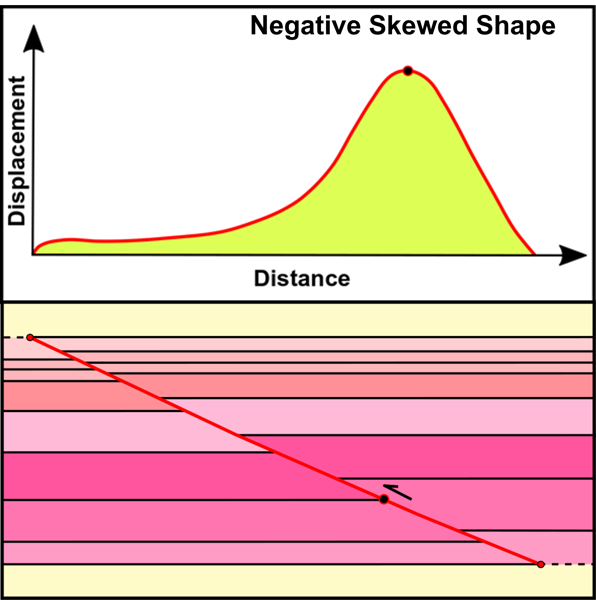



Guide of the Displacement-Distance Plot for the Analyzed Fault


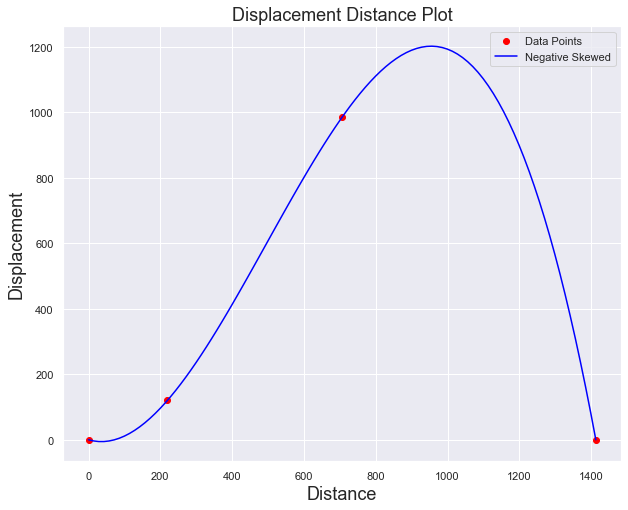

In [21]:
Fault_length = get_Fault_length(sample_test)
Max_Displacement = get_Max_Displacement(Fault_length)
Fault_distance = get_Distance_reference_point(sample_test)
Profile_pattern = get_Profile_Pattern(Fault_length, Max_Displacement)
fault_size = classify_fault_size(Fault_length)
points = create_points(Fault_length, Fault_distance, Max_Displacement, sample_test)

# Print the results
print("Results:")
print(f"The Fault Length is: {Fault_length: .2f} meters")
print(f"The fault is classified as {fault_size}.")
print(f"The displacement reading sample is at the {sample_test['Section']} part of the thrust fault.")
print(f"The Maximum Displacement is : {Max_Displacement: .2f} meters")
print(f"The Profile Pattern is: {Profile_pattern}")
result = analyze_displacement(Profile_pattern)
print(result)
print("\n")
print(f"Example of the Anticipated Displacement Distance Profile and the Corresponding Subsurface Model")
get_Profile_pattern_shape(Profile_pattern)
print("\n")
print(f"Guide of the Displacement-Distance Plot for the Analyzed Fault")
plot_selected_curve(points, Profile_pattern)

### Example-2

In [22]:
sample_test = {'Displacement': 532, # 532,
                'HorizonName': 'F-2', 
                'Uncertainty': 'Proven', 
                'Section': 'Upper', 
                'Lithology': 'coarse sandstone'}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Results:
The Fault Length is:  1823.65 meters
The fault is classified as Medium Fault.
The displacement reading sample is at the Upper part of the thrust fault.
The Maximum Displacement is :  985.40 meters
The Profile Pattern is: Bell
The Maximum Displacement is at the Middle part of the fault.
The hard or competent layers at the Middle part of the fault.


Example of the Anticipated Displacement Distance Profile and the Corresponding Subsurface Model


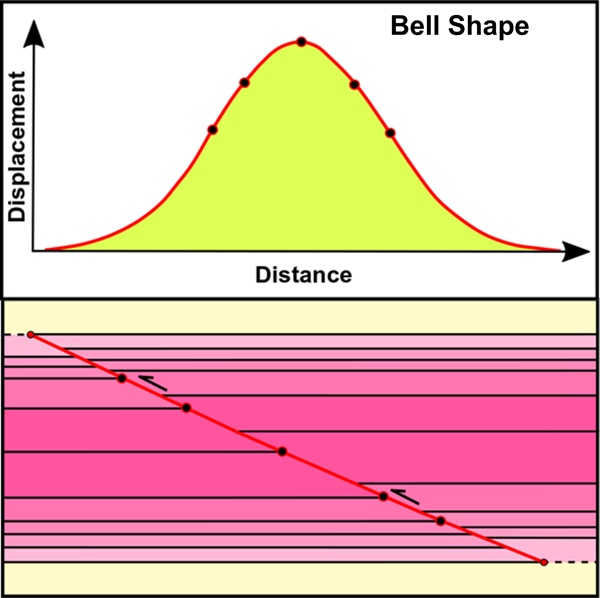



Guide of the Displacement-Distance Plot for the Analyzed Fault


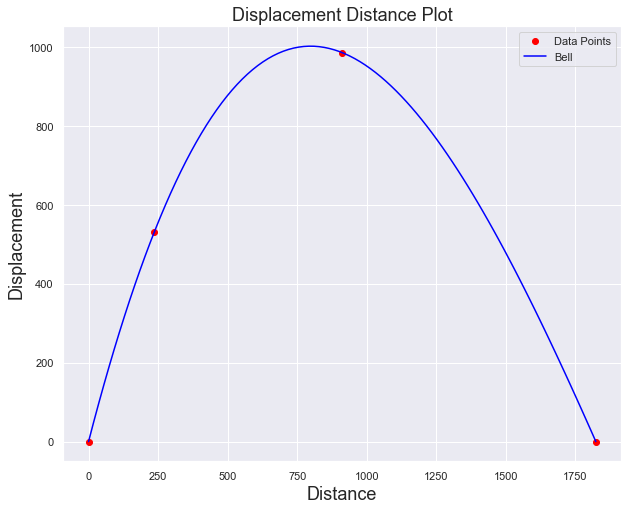

In [23]:
Fault_length = get_Fault_length(sample_test)
Max_Displacement = get_Max_Displacement(Fault_length)
Fault_distance = get_Distance_reference_point(sample_test)
Profile_pattern = get_Profile_Pattern(Fault_length, Max_Displacement)
fault_size = classify_fault_size(Fault_length)
points = create_points(Fault_length, Fault_distance, Max_Displacement, sample_test)

# Print the results
print("Results:")
print(f"The Fault Length is: {Fault_length: .2f} meters")
print(f"The fault is classified as {fault_size}.")
print(f"The displacement reading sample is at the {sample_test['Section']} part of the thrust fault.")
print(f"The Maximum Displacement is : {Max_Displacement: .2f} meters")
print(f"The Profile Pattern is: {Profile_pattern}")
result = analyze_displacement(Profile_pattern)
print(result)
print("\n")
print(f"Example of the Anticipated Displacement Distance Profile and the Corresponding Subsurface Model")
get_Profile_pattern_shape(Profile_pattern)
print("\n")
print(f"Guide of the Displacement-Distance Plot for the Analyzed Fault")
plot_selected_curve(points, Profile_pattern)

### Example-3

In [24]:
sample_test = {'Displacement':  24, # 24, 
                'HorizonName': 'F', # F 
                'Uncertainty': 'Secured', # Proven, Secured or 
                'Section': 'Lower', 
                'Lithology': 'coarse sandstone'}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Results:
The Fault Length is:  970.12 meters
The fault is classified as Medium Fault.
The displacement reading sample is at the Lower part of the thrust fault.
The Maximum Displacement is :  985.40 meters
The Profile Pattern is: Semi-Circle
The Maximum Displacement is at the Middle part of the fault.
The hard or competent layers at the Middle part of the fault.


Example of the Anticipated Displacement Distance Profile and the Corresponding Subsurface Model


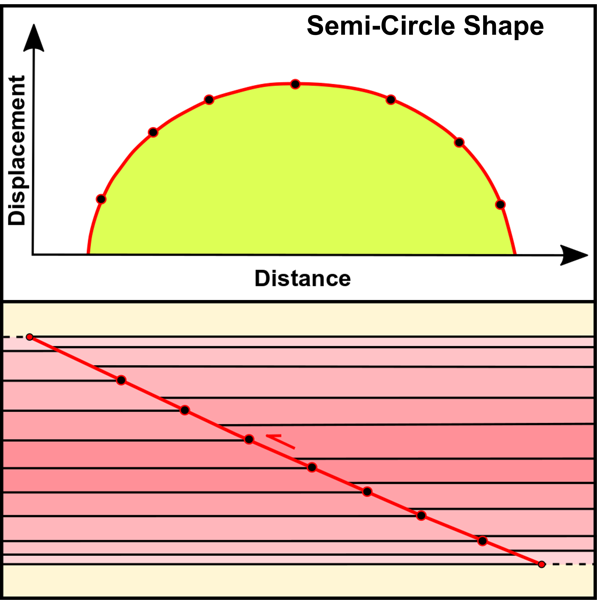



Guide of the Displacement-Distance Plot for the Analyzed Fault


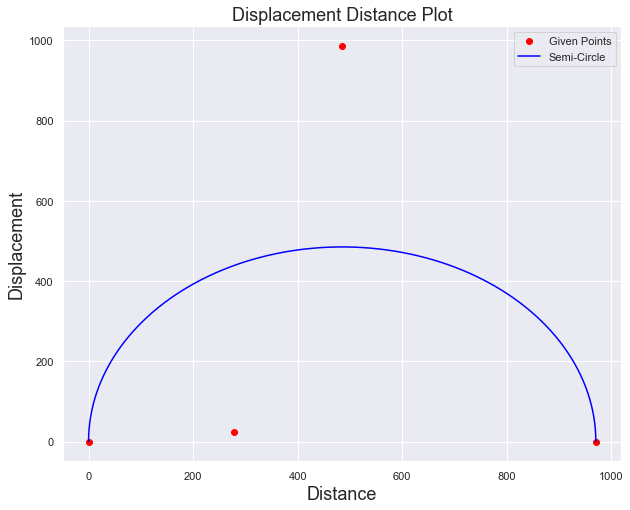

In [25]:
Fault_length = get_Fault_length(sample_test)
Max_Displacement = get_Max_Displacement(Fault_length)
Fault_distance = get_Distance_reference_point(sample_test)
Profile_pattern = get_Profile_Pattern(Fault_length, Max_Displacement)
fault_size = classify_fault_size(Fault_length)
points = create_points(Fault_length, Fault_distance, Max_Displacement, sample_test)

# Print the results
print("Results:")
print(f"The Fault Length is: {Fault_length: .2f} meters")
print(f"The fault is classified as {fault_size}.")
print(f"The displacement reading sample is at the {sample_test['Section']} part of the thrust fault.")
print(f"The Maximum Displacement is : {Max_Displacement: .2f} meters")
print(f"The Profile Pattern is: {Profile_pattern}")
result = analyze_displacement(Profile_pattern)
print(result)
print("\n")
print(f"Example of the Anticipated Displacement Distance Profile and the Corresponding Subsurface Model")
get_Profile_pattern_shape(Profile_pattern)
print("\n")
print(f"Guide of the Displacement-Distance Plot for the Analyzed Fault")
plot_selected_curve(points, Profile_pattern)

## Example-4

In [26]:
sample_test = {'Displacement': 54, 
                'HorizonName': 'Er', 
                'Uncertainty': 'Assumed', # Proven, Secured or 
                'Section': 'Mid', 
                'Lithology': 'Rhyolite tuff'}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Results:
The Fault Length is:  621.67 meters
The fault is classified as Small Fault.
The displacement reading sample is at the Mid part of the thrust fault.
The Maximum Displacement is :  985.40 meters
The Profile Pattern is: Positive Skewed
The Maximum Displacement is at the Upper part of the fault. 
The hard or competent layers at the Upper part of the fault.


Example of the Anticipated Displacement Distance Profile and the Corresponding Subsurface Model


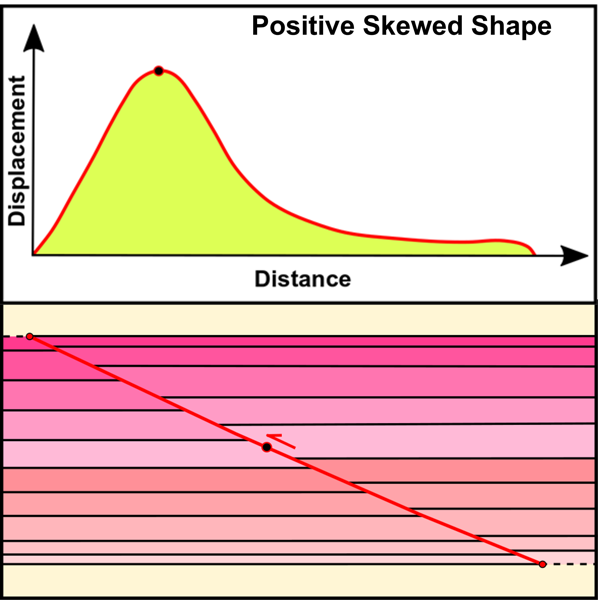



Guide of the Displacement-Distance Plot for the Analyzed Fault


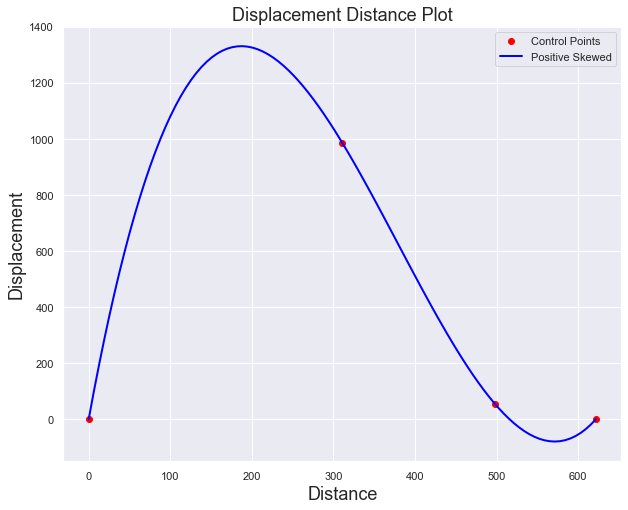

In [27]:
Fault_length = get_Fault_length(sample_test)
Max_Displacement = get_Max_Displacement(Fault_length)
Fault_distance = get_Distance_reference_point(sample_test)
Profile_pattern = get_Profile_Pattern(Fault_length, Max_Displacement)
fault_size = classify_fault_size(Fault_length)
points = create_points(Fault_length, Fault_distance, Max_Displacement, sample_test)

# Print the results
print("Results:")
print(f"The Fault Length is: {Fault_length: .2f} meters")
print(f"The fault is classified as {fault_size}.")
print(f"The displacement reading sample is at the {sample_test['Section']} part of the thrust fault.")
print(f"The Maximum Displacement is : {Max_Displacement: .2f} meters")
print(f"The Profile Pattern is: {Profile_pattern}")
result = analyze_displacement(Profile_pattern)
print(result)
print("\n")
print(f"Example of the Anticipated Displacement Distance Profile and the Corresponding Subsurface Model")
get_Profile_pattern_shape(Profile_pattern)
print("\n")
print(f"Guide of the Displacement-Distance Plot for the Analyzed Fault")
plot_selected_curve(points, Profile_pattern)

## Example-5

In [28]:
sample_test = {'Displacement': 562, 
                'HorizonName': 'F', 
                'Uncertainty': 'Proven', # Proven, Secured or Assumed
                'Section': 'Upper', 
                'Lithology': 'Rhyolite tuff'}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Results:
The Fault Length is:  2467.29 meters
The fault is classified as Large Fault.
The displacement reading sample is at the Upper part of the thrust fault.
The Maximum Displacement is :  985.40 meters
The Profile Pattern is: Negative Skewed
The Maximum Displacement is at the Lower part of the fault.
The hard or competent layers at the Lower part of the fault.


Example of the Anticipated Displacement Distance Profile and the Corresponding Subsurface Model


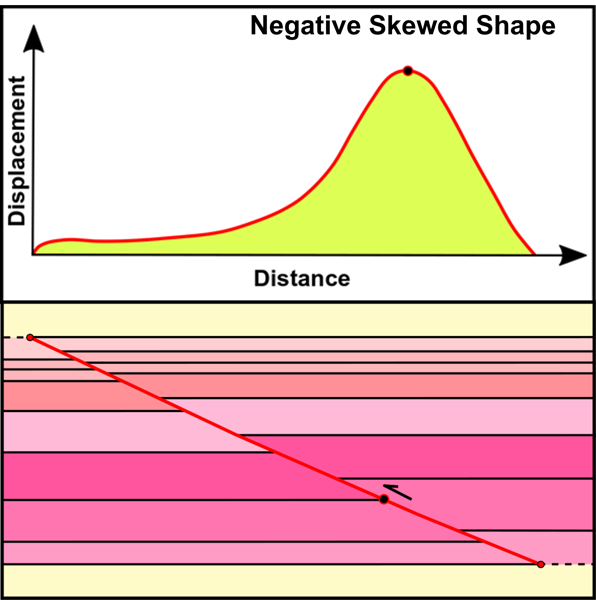



Guide of the Displacement-Distance Plot for the Analyzed Fault


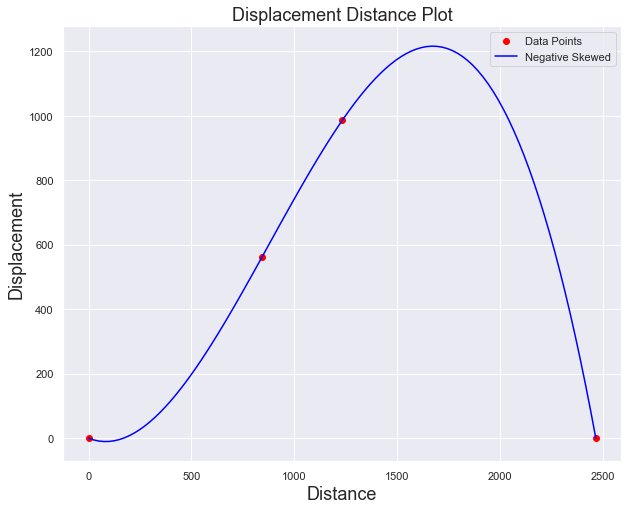

In [29]:
Fault_length = get_Fault_length(sample_test)
Max_Displacement = get_Max_Displacement(Fault_length)
Fault_distance = get_Distance_reference_point(sample_test)
Profile_pattern = get_Profile_Pattern(Fault_length, Max_Displacement)
fault_size = classify_fault_size(Fault_length)

points = create_points(Fault_length, Fault_distance, Max_Displacement, sample_test)


# Print the results
print("Results:")
print(f"The Fault Length is: {Fault_length: .2f} meters")
print(f"The fault is classified as {fault_size}.")
print(f"The displacement reading sample is at the {sample_test['Section']} part of the thrust fault.")
print(f"The Maximum Displacement is : {Max_Displacement: .2f} meters")
print(f"The Profile Pattern is: {Profile_pattern}")
result = analyze_displacement(Profile_pattern)
print(result)
print("\n")
print(f"Example of the Anticipated Displacement Distance Profile and the Corresponding Subsurface Model")
get_Profile_pattern_shape(Profile_pattern)
print("\n")
print(f"Guide of the Displacement-Distance Plot for the Analyzed Fault")
plot_selected_curve(points, Profile_pattern)

In [30]:
################

## Example-6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Results:
The Fault Length is:  2467.29 meters
The fault is classified as Large Fault.
The displacement reading sample is at the Upper part of the thrust fault.
The Maximum Displacement is :  985.40 meters
The Profile Pattern is: Triangle
The Maximum Displacement is at the Upper part of the fault. 
The hard or competent layers at the Upper part of the fault.


Example of the Anticipated Displacement Distance Profile and the Corresponding Subsurface Model


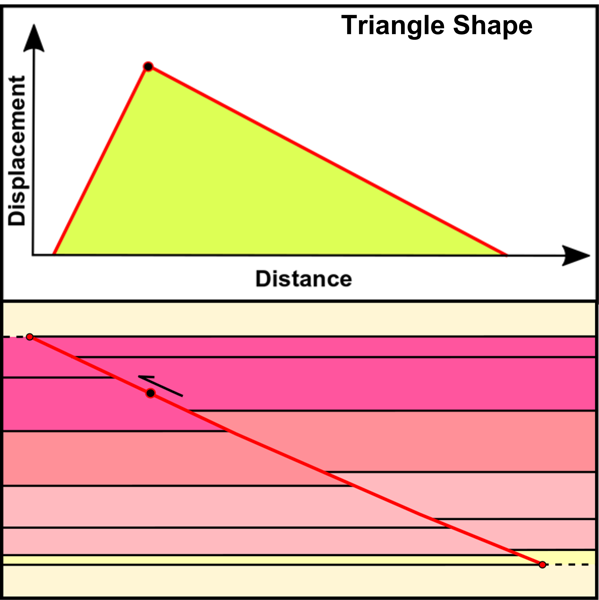



Guide of the Displacement-Distance Plot for the Analyzed Fault


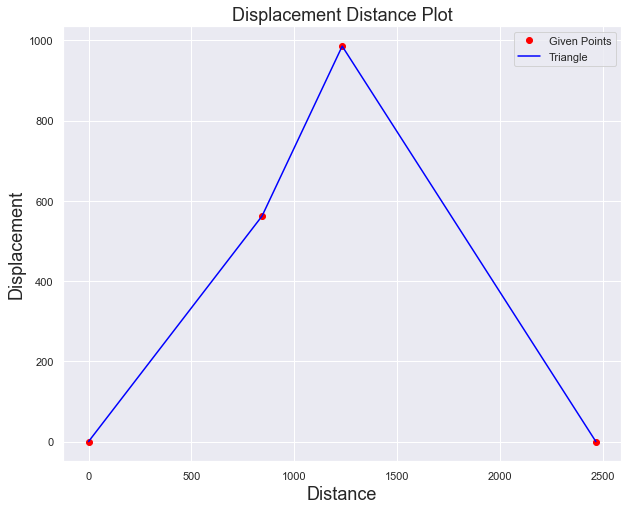

In [31]:
Fault_length = get_Fault_length(sample_test)
Max_Displacement = get_Max_Displacement(Fault_length)
Fault_distance = get_Distance_reference_point(sample_test)
Profile_pattern =  "Triangle" # get_Profile_Pattern(Fault_length, Max_Displacement)
fault_size = classify_fault_size(Fault_length)

points = create_points(Fault_length, Fault_distance, Max_Displacement, sample_test)

# Print the results
print("Results:")
print(f"The Fault Length is: {Fault_length: .2f} meters")
print(f"The fault is classified as {fault_size}.")
print(f"The displacement reading sample is at the {sample_test['Section']} part of the thrust fault.")
print(f"The Maximum Displacement is : {Max_Displacement: .2f} meters")
print(f"The Profile Pattern is: {Profile_pattern}")
result = analyze_displacement(Profile_pattern)
print(result)
print("\n")
print(f"Example of the Anticipated Displacement Distance Profile and the Corresponding Subsurface Model")
get_Profile_pattern_shape(Profile_pattern)
print("\n")
print(f"Guide of the Displacement-Distance Plot for the Analyzed Fault")
plot_selected_curve(points, Profile_pattern)

## Example-7

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Results:
The Fault Length is:  2467.29 meters
The fault is classified as Large Fault.
The displacement reading sample is at the Upper part of the thrust fault.
The Maximum Displacement is :  985.40 meters
The Profile Pattern is: Trapezoid
The Maximum Displacement is at the Middle part of the fault.
The hard or competent layers at the Middle part of the fault.


Example of the Anticipated Displacement Distance Profile and the Corresponding Subsurface Model


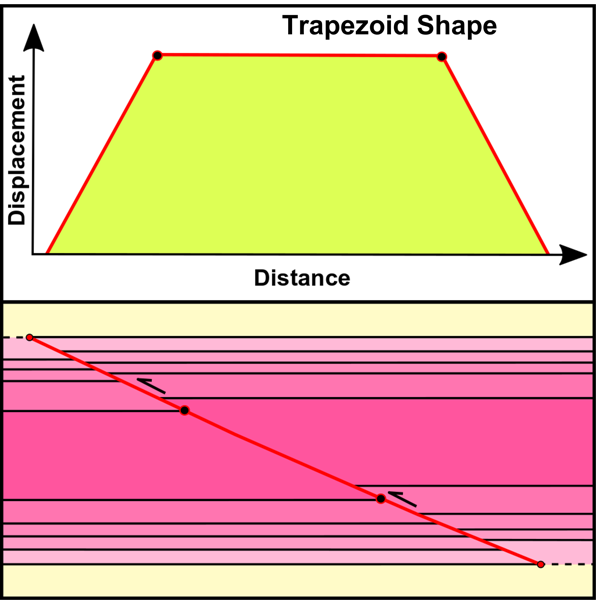



Guide of the Displacement-Distance Plot for the Analyzed Fault


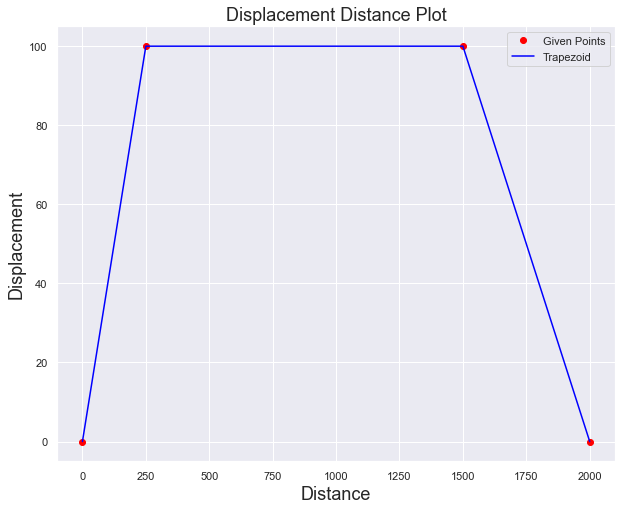

In [32]:
Fault_length = get_Fault_length(sample_test)
Max_Displacement = get_Max_Displacement(Fault_length)
Fault_distance = get_Distance_reference_point(sample_test)
Profile_pattern =  "Trapezoid" # get_Profile_Pattern(Fault_length, Max_Displacement)
fault_size = classify_fault_size(Fault_length)

points = np.array([[0, 0], 
                   [250, 100],
                   [1500, 100], 
                   [2000, 0]])

# Print the results
print("Results:")
print(f"The Fault Length is: {Fault_length: .2f} meters")
print(f"The fault is classified as {fault_size}.")
print(f"The displacement reading sample is at the {sample_test['Section']} part of the thrust fault.")
print(f"The Maximum Displacement is : {Max_Displacement: .2f} meters")
print(f"The Profile Pattern is: {Profile_pattern}")
result = analyze_displacement(Profile_pattern)
print(result)
print("\n")
print(f"Example of the Anticipated Displacement Distance Profile and the Corresponding Subsurface Model")
get_Profile_pattern_shape(Profile_pattern)
print("\n")
print(f"Guide of the Displacement-Distance Plot for the Analyzed Fault")
plot_selected_curve(points, Profile_pattern)

## Example-8

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Results:
The Fault Length is:  2467.29 meters
The fault is classified as Large Fault.
The displacement reading sample is at the Upper part of the thrust fault.
The Maximum Displacement is :  985.40 meters
The Profile Pattern is: Overlap
The Maximum Displacement could be at the Upper or Lower part of the fault.
The Soft or incompetent layers at the Middle part of the fault.


Example of the Anticipated Displacement Distance Profile and the Corresponding Subsurface Model


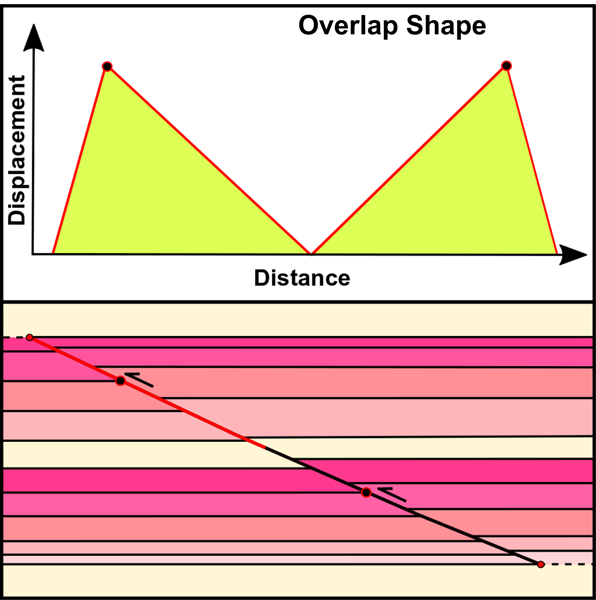



Guide of the Displacement-Distance Plot for the Analyzed Fault


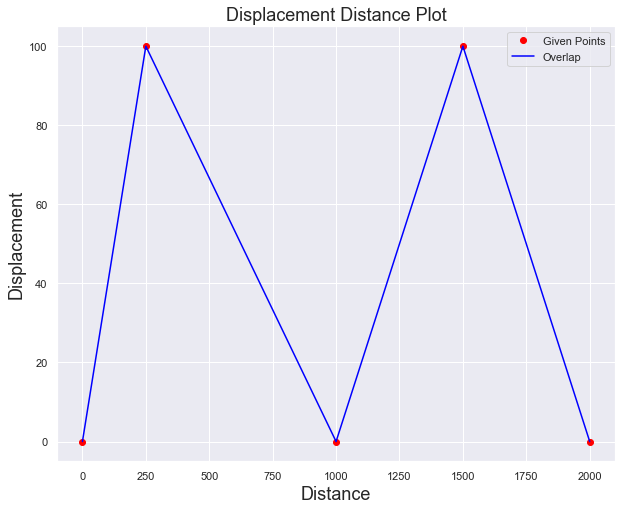

In [33]:
Fault_length = get_Fault_length(sample_test)
Max_Displacement = get_Max_Displacement(Fault_length)
Fault_distance = get_Distance_reference_point(sample_test)
Profile_pattern =  "Overlap" # get_Profile_Pattern(Fault_length, Max_Displacement)
fault_size = classify_fault_size(Fault_length)

points = np.array([[0, 0], 
                   [250, 100],
                   [1000, 0],
                   [1500, 100], 
                   [2000, 0]])

# Print the results
print("Results:")
print(f"The Fault Length is: {Fault_length: .2f} meters")
print(f"The fault is classified as {fault_size}.")
print(f"The displacement reading sample is at the {sample_test['Section']} part of the thrust fault.")
print(f"The Maximum Displacement is : {Max_Displacement: .2f} meters")
print(f"The Profile Pattern is: {Profile_pattern}")
result = analyze_displacement(Profile_pattern)
print(result)
print("\n")
print(f"Example of the Anticipated Displacement Distance Profile and the Corresponding Subsurface Model")
get_Profile_pattern_shape(Profile_pattern)
print("\n")
print(f"Guide of the Displacement-Distance Plot for the Analyzed Fault")
plot_selected_curve(points, Profile_pattern)

##### By: Ramy Abdallah
PhD candidate working on Reducing uncertainty of subsurface interpretation in fold-thrust models from outcrops to machine learning.
#####  Thank you

In [34]:
# sample_test = {'Displacement': 84, 
#                 'HorizonName': 'Er', 
#                 'Uncertainty': 'Assumed', # Proven, Secured or 
#                 'Section': 'Mid', 
#                 'Lithology': 'Rhyolite tuff'}
# Bell shape